In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('../data/train_data.csv')

df

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


In [33]:
from scipy.stats import spearmanr

rho_tenure, p_tenure = spearmanr(df["Tenure"], df["Exited"])
print(f"✅ Corrélation Spearman Tenure vs Exited: {rho_tenure:.4f} (p-value = {p_tenure:.4f})")


✅ Corrélation Spearman Tenure vs Exited: -0.0191 (p-value = 0.0000)


<Axes: xlabel='Exited', ylabel='NumOfProducts'>

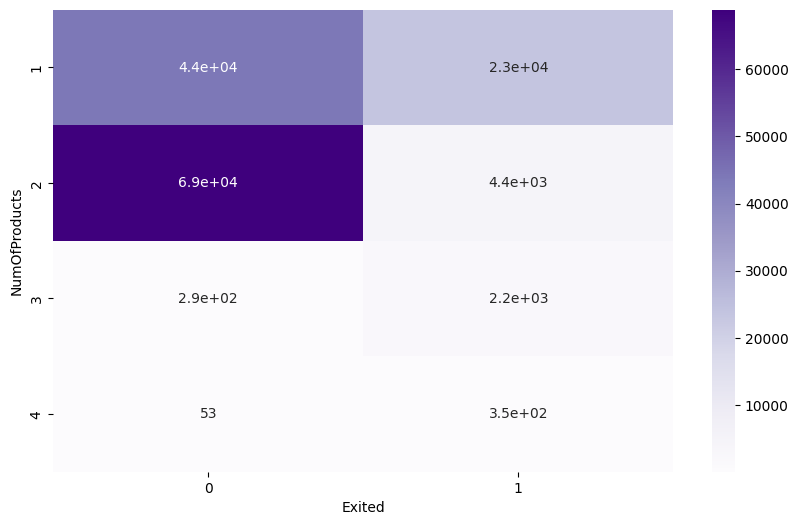

In [15]:
from scipy.stats import chi2_contingency, fisher_exact

# We assume the hypothesis that Geography, CreditScore, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember are independant from Exited. 
# We will test this hypothesis using the chi2 test.

# I'd like a contengency table will all those varibales vs Exited, then I will run the chi2 test on each of them.

# Geography
contingency_table = pd.crosstab(df['NumOfProducts'], df['Exited'])
# chi2, p, dof, expected = chi2_contingency(contingency_table)
# print('Geography')
# print('p-value:', p)
# print('chi2:', chi2)
# print('dof:', dof)
# print('expected:', expected)
plt.figure(figsize=(10,6))
sns.heatmap(contingency_table, annot=True, cmap="Purples")




In [13]:
import pandas as pd

contingency_table = pd.crosstab(df["Gender"], df["Exited"])
contingency_table["Churn_Rate"] = contingency_table[1] / (contingency_table[0] + contingency_table[1]) * 100

print(contingency_table)


Exited      0      1  Churn_Rate
Gender                          
Female  45038  17575   28.069251
Male    68091  12875   15.901737


In [14]:
import numpy as np
import scipy.stats as stats

chi2, p, dof, expected = stats.chi2_contingency(contingency_table.iloc[:, :2])

n = contingency_table.sum().sum()  # Total des observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))

print(f"🔹 Cramer's V = {cramers_v:.4f}")


🔹 Cramer's V = 0.1476


In [19]:
df["NumOfProducts"] = df["NumOfProducts"].replace('3+', 3).astype(int)
df["NumOfProducts"] = df["NumOfProducts"].apply(lambda x: "3+" if x >= 3 else str(x))
contingency_table = pd.crosstab(df["NumOfProducts"], df["Exited"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"✅ Nouveau test du chi² après regroupement : p-value = {p:.4f}")


✅ Nouveau test du chi² après regroupement : p-value = 0.0000


In [24]:
import numpy as np
import scipy.stats as stats

contingency_table = pd.crosstab(df["Tenure"], df["Exited"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Calcul de Cramer's V
n = contingency_table.sum().sum()  # Nombre total d'observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))

print(f"✅ Cramer’s V = {cramers_v:.4f}")


✅ Cramer’s V = 0.0404


In [27]:
df["HasBalance"] = (df["Balance"] > 0).astype(int)

import scipy.stats as stats
import pandas as pd

contingency_table = pd.crosstab(df["HasBalance"], df["Exited"])

# Test du chi²
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("🔹 Table de contingence :\n", contingency_table)
print(f"✅ Test du chi² : p-value = {p:.4f}")


🔹 Table de contingence :
 Exited          0      1
HasBalance              
0           65326  12592
1           47803  17858
✅ Test du chi² : p-value = 0.0000


In [28]:
import numpy as np

n = contingency_table.sum().sum()  # Nombre total d’observations
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))

print(f"✅ Cramer’s V = {cramers_v:.4f}")


✅ Cramer’s V = 0.1345


In [29]:
contingency_table["Churn_Rate"] = contingency_table[1] / (contingency_table[0] + contingency_table[1]) * 100
print(contingency_table)


Exited          0      1  Churn_Rate
HasBalance                          
0           65326  12592   16.160579
1           47803  17858   27.197271


In [30]:
from scipy.stats import spearmanr

rho_balance, p_balance = spearmanr(df["Balance"], df["Exited"])
rho_hasbalance, p_hasbalance = spearmanr(df["HasBalance"], df["Exited"])

print(f"✅ Corrélation Spearman Balance vs Exited: {rho_balance:.4f} (p-value = {p_balance:.4f})")
print(f"✅ Corrélation Spearman HasBalance vs Exited: {rho_hasbalance:.4f} (p-value = {p_hasbalance:.4f})")


✅ Corrélation Spearman Balance vs Exited: 0.1273 (p-value = 0.0000)
✅ Corrélation Spearman HasBalance vs Exited: 0.1345 (p-value = 0.0000)


In [32]:
from sklearn.preprocessing import StandardScaler

# Définir les colonnes à normaliser
cols_to_normalize = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

# Appliquer StandardScaler
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

print(df.head())  # Vérifier les nouvelles valeurs

       ID  CustomerId     Surname  CreditScore Geography  Gender       Age  \
0   37765    15794860      Ch'eng    -0.366683    France    Male -1.143467   
1  130453    15728005  Hargreaves    -0.740701    France    Male -0.467158   
2   77297    15686810       Ts'ui     0.842641    France    Male  0.096433   
3   40858    15760244   Trevisano     0.082138   Germany  Female  2.012643   
4   19804    15810563      French    -0.366683    France  Female -0.579876   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       7  1.212313              1        1.0             1.0   
1       2 -0.883978              2        0.0             1.0   
2       7 -0.883978              2        1.0             1.0   
3       5  1.003521              3        1.0             0.0   
4       5 -0.883978              2        1.0             1.0   

   EstimatedSalary  Exited  
0         0.967675       0  
1         1.369525       0  
2        -0.231952       0  
3        -1.021154      

In [34]:
import pandas as pd

# Sélection des variables continues
continuous_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

# Calcul des quartiles
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes inférieure et supérieure
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Afficher le nombre d'outliers détectés par variable
outliers_iqr = ((df[continuous_features] < lower_bound) | (df[continuous_features] > upper_bound)).sum()
print("🔹 Nombre d’outliers détectés par IQR :\n", outliers_iqr)


🔹 Nombre d’outliers détectés par IQR :
 CreditScore         230
Age                5607
Balance               0
EstimatedSalary       0
dtype: int64


In [36]:
df["Age"] = df["Age"].clip(lower=lower_bound["Age"], upper=upper_bound["Age"])
df_clean = df[~((df["CreditScore"] < lower_bound["CreditScore"]) | (df["CreditScore"] > upper_bound["CreditScore"]))]


In [38]:
# Test de normalité (Shapiro-Wilk) pour voir si on peut appliquer un test de Student
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

continuous_features = ["CreditScore", "EstimatedSalary"]
target = "Exited"

normality_tests = {feature: shapiro(df[feature]) for feature in continuous_features}

# Test de Student (si normalité) ou Mann-Whitney (sinon)
def compare_groups(feature, target):
    group_0 = df[df[target] == 0][feature]
    group_1 = df[df[target] == 1][feature]
    
    # Vérification de la normalité avec Shapiro-Wilk (p > 0.05 signifie normal)
    stat, p_shapiro = shapiro(df[feature])
    
    if p_shapiro > 0.05:
        # Test de Student
        stat_test, p_value = ttest_ind(group_0, group_1, equal_var=False)
        test_type = "Student (t-test)"
    else:
        # Test de Mann-Whitney
        stat_test, p_value = mannwhitneyu(group_0, group_1, alternative="two-sided")
        test_type = "Mann-Whitney"
    
    return test_type, p_shapiro, p_value

# Exécution des tests
test_results = {feature: compare_groups(feature, target) for feature in continuous_features}

# Affichage des résultats
test_results


{'CreditScore': ('Mann-Whitney',
  np.float64(6.874497513424243e-45),
  np.float64(1.37420328030162e-27)),
 'EstimatedSalary': ('Mann-Whitney',
  np.float64(2.0263297591795444e-90),
  np.float64(8.444548354519292e-15))}

In [39]:
# Fonction pour calculer Cramer's V
def cramers_v(feature, target):
    # Binariser la variable continue en 4 groupes (quartiles)
    df["binned_" + feature] = pd.qcut(df[feature], q=4, duplicates='drop')  
    contingency_table = pd.crosstab(df["binned_" + feature], df[target])
    
    # Calcul du chi2
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    
    # Calcul de Cramer's V
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Calcul de Cramer's V pour les deux variables
cramers_v_results = {feature: cramers_v(feature, target) for feature in continuous_features}

# Affichage des résultats
cramers_v_results


{'CreditScore': np.float64(0.03893824160686858),
 'EstimatedSalary': np.float64(0.02372954234849593)}